In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store = pd.read_csv("store.csv")
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


- Average Revenue or Sales per customer of each store type
- Sales and Customers depending on Store so that we can see if competition distance has an impact
- Promo2SinceWeek Promo2SinceYear PromoInterval are NMAR as they are linked to Promo2 being 0 or 1.
- Split and see if participating in Promo2 has an impact on sales and customers.
- Check for seasonality using the PromoInterval
- Check for Assortment Type and impact of sales and customers
-

In [38]:
store.PromoInterval.unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [46]:
store2 = pd.get_dummies(store, columns = ["PromoInterval"], dummy_na = True, dtype = int)
store2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_nan
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,0,0,0,1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,0,1,0,0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,0,1,0,0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,0,0,0,1
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,0,0,0,1


In [47]:
store2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Store                           1115 non-null   int64  
 1   StoreType                       1115 non-null   object 
 2   Assortment                      1115 non-null   object 
 3   CompetitionDistance             1112 non-null   float64
 4   CompetitionOpenSinceMonth       761 non-null    float64
 5   CompetitionOpenSinceYear        761 non-null    float64
 6   Promo2                          1115 non-null   int64  
 7   Promo2SinceWeek                 571 non-null    float64
 8   Promo2SinceYear                 571 non-null    float64
 9   PromoInterval_Feb,May,Aug,Nov   1115 non-null   int32  
 10  PromoInterval_Jan,Apr,Jul,Oct   1115 non-null   int32  
 11  PromoInterval_Mar,Jun,Sept,Dec  1115 non-null   int32  
 12  PromoInterval_nan               11

In [3]:
store.shape

(1115, 10)

In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
store.Store.nunique()

1115

In [6]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
store.Promo2SinceYear.value_counts()

Promo2SinceYear
2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: count, dtype: int64

In [8]:
store.PromoInterval.value_counts()

PromoInterval
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64

In [9]:
store.StoreType.value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

In [10]:
store.Assortment.value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

In [11]:
train = pd.read_csv("train.csv")
train.head()

C:\Users\msala\AppData\Local\Temp\ipykernel_29480\1838003032.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [12]:
not_open = train[train.Open == 0]

In [13]:
not_open.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,31/07/2015,0,0,0,1,0,1
875,876,5,31/07/2015,0,0,0,1,0,1
1406,292,4,30/07/2015,0,0,0,1,0,1
1990,876,4,30/07/2015,0,0,0,1,0,1
2521,292,3,29/07/2015,0,0,0,1,0,1


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [15]:
train[train.Store == 1114]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1113,1114,5,31/07/2015,27508,3745,1,1,0,1
2228,1114,4,30/07/2015,24395,3251,1,1,0,1
3343,1114,3,29/07/2015,25840,3545,1,1,0,1
4458,1114,2,28/07/2015,25518,3456,1,1,0,1
5573,1114,1,27/07/2015,26720,3468,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1012748,1114,6,05/01/2013,18856,3065,1,0,0,0
1013863,1114,5,04/01/2013,18371,3036,1,0,0,1
1014978,1114,4,03/01/2013,18463,3211,1,0,0,1
1016093,1114,3,02/01/2013,20642,3401,1,0,0,1


In [16]:
train.Store.value_counts()

Store
1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: count, Length: 1115, dtype: int64

In [17]:
train.Date

0          31/07/2015
1          31/07/2015
2          31/07/2015
3          31/07/2015
4          31/07/2015
              ...    
1017204    01/01/2013
1017205    01/01/2013
1017206    01/01/2013
1017207    01/01/2013
1017208    01/01/2013
Name: Date, Length: 1017209, dtype: object

In [18]:
train.Store.nunique()

1115

In [19]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [20]:
train.DayOfWeek.value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

In [21]:
train.shape

(1017209, 9)

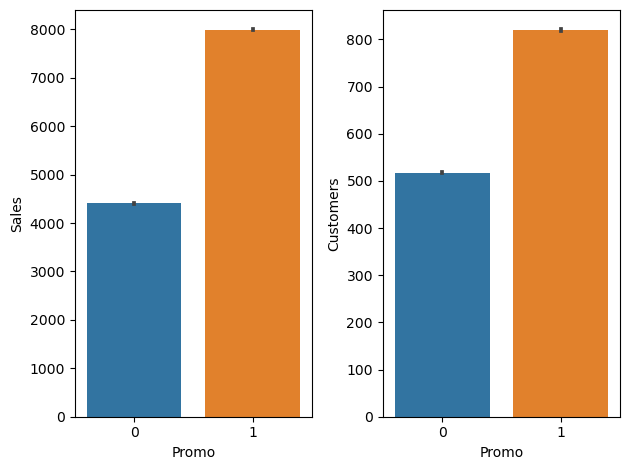

In [22]:
ax1 = plt.subplot(1, 2, 1)
sns.barplot(data = train, x = 'Promo', y = 'Sales')

ax2 = plt.subplot(1,2,2)
sns.barplot(data = train, x = 'Promo', y = 'Customers')

plt.tight_layout()
plt.show()

In [23]:
train['Date'] = pd.to_datetime(train['Date'], dayfirst= True)

In [24]:
train['day_of_week'] = train['Date'].dt.day_name()
train['week_of_year'] = train['Date'].dt.isocalendar().week

In [25]:
train.Date.isna().sum()

0

In [26]:
train.day_of_week.value_counts()

day_of_week
Friday       145845
Thursday     145845
Wednesday    145665
Tuesday      145664
Monday       144730
Sunday       144730
Saturday     144730
Name: count, dtype: int64

In [27]:
train.DayOfWeek.value_counts().sort_index()

DayOfWeek
1    144730
2    145664
3    145665
4    145845
5    145845
6    144730
7    144730
Name: count, dtype: int64

We can see that there seems to be a mismatch in the way that the day of the week has been classified. Question will be to decide whether to use the numeric Day of the week or drop it.

In [28]:
average_sales = train.groupby(['week_of_year'])['Sales'].mean().reset_index()

average_sales['sales_percent_change'] = average_sales['Sales'].pct_change()
average_sales.head(10)

,week_of_year,Sales,sales_percent_change
0,1,4339.044625,NaN
1,2,6354.031219,0.464385
2,3,5111.601025,-0.195534
3,4,5595.613496,0.094689
4,5,5463.895836,-0.023539
5,6,6504.228144,0.190401
6,7,4871.796242,-0.250980
7,8,6198.905403,0.272407
8,9,5015.960837,-0.190831
9,10,6576.679906,0.311151


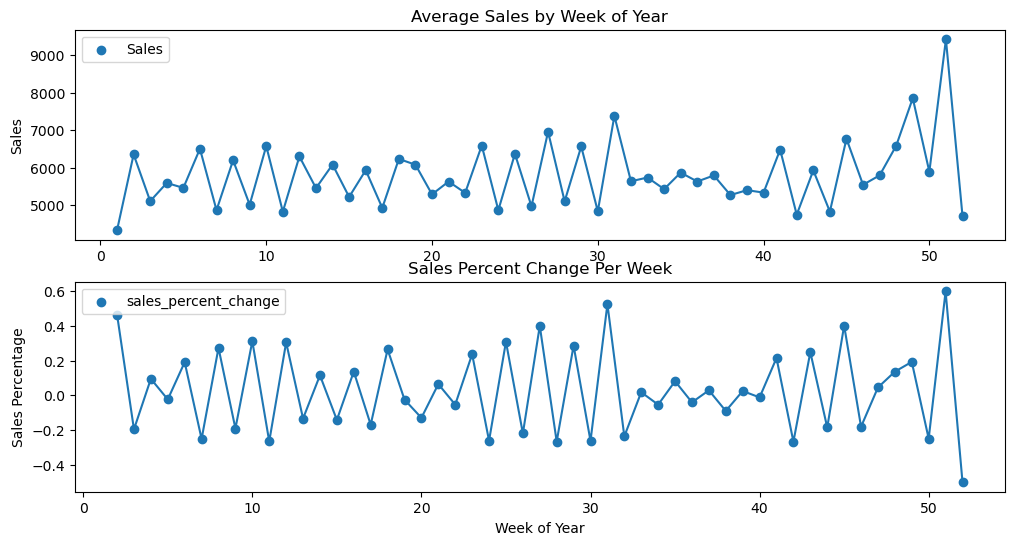

In [29]:
plt.figure(figsize = (12, 6))
ax = plt.subplot(2, 1, 1)

# Scatter plot
ax.scatter(x='week_of_year', y='Sales', data=average_sales)

# Line plot
ax.plot(average_sales['week_of_year'], average_sales['Sales'])


# Set labels and title

ax.set_ylabel('Sales')
ax.set_title('Average Sales by Week of Year')

ax.legend()

ax2 = plt.subplot(2,1,2)

ax2.scatter(x='week_of_year', y='sales_percent_change', data=average_sales)
ax2.plot(average_sales['week_of_year'], average_sales['sales_percent_change'])

ax2.set_xlabel('Week of Year')
ax2.set_ylabel('Sales Percentage')
ax2.set_title('Sales Percent Change Per Week')

ax2.legend()

# Show the plot
plt.tight_layout
plt.show()

In [30]:
average_sales_by_DayOfWeek = train.groupby(["day_of_week"])[["Sales", "Customers"]].mean().reset_index()
average_sales_by_DayOfWeek

,day_of_week,Sales,Customers
0,Friday,6723.274305,743.150742
1,Monday,7809.044510,813.065791
2,Saturday,5847.562599,657.112237
3,Sunday,204.183189,35.786817
4,Thursday,6247.575913,697.541486
5,Tuesday,7005.244467,760.984615
6,Wednesday,6555.884138,721.639666


In [31]:
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

average_sales_by_DayOfWeek['day_of_week'] = average_sales_by_DayOfWeek['day_of_week'].map(day_mapping)

average_sales_by_DayOfWeek

,day_of_week,Sales,Customers
0,5,6723.274305,743.150742
1,1,7809.044510,813.065791
2,6,5847.562599,657.112237
3,7,204.183189,35.786817
4,4,6247.575913,697.541486
5,2,7005.244467,760.984615
6,3,6555.884138,721.639666


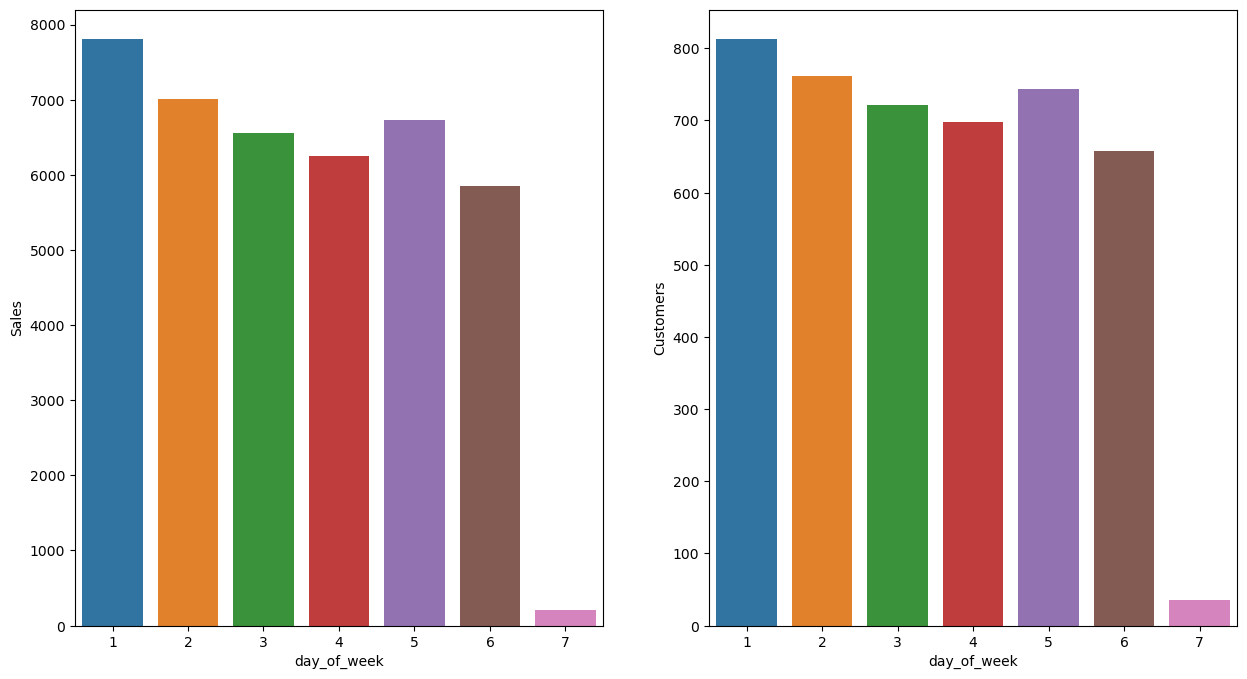

In [32]:
plt.figure(figsize=(15, 8))
ax = plt.subplot(1,2,1)
sns.barplot(x = 'day_of_week', y = 'Sales', data = average_sales_by_DayOfWeek)

ax2 = plt.subplot(1,2,2)
sns.barplot(x = 'day_of_week', y = 'Customers', data = average_sales_by_DayOfWeek)
plt.show()

<Axes: xlabel='Open', ylabel='count'>

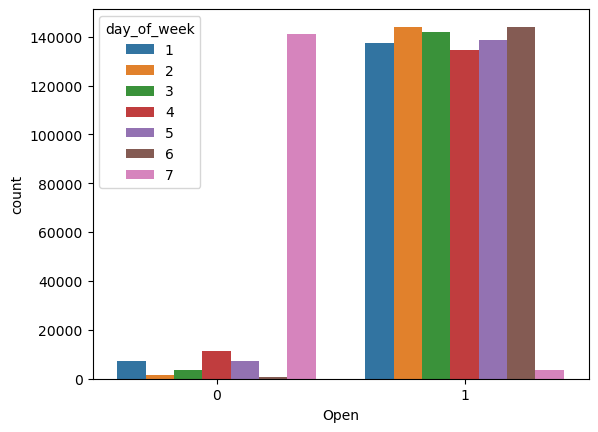

In [33]:
train['day_of_week'] = train['day_of_week'].map(day_mapping)
sns.countplot(x = 'Open', data = train, hue = 'day_of_week')

In [34]:
test = pd.read_csv("test.csv")
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [36]:
test.shape

(41088, 9)

In [37]:
test.isna().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64